In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.drop(columns=['instant','dteday','casual','registered','atemp'],inplace = True)

In [8]:
#instant because it is a index column and does not predict ath
#Dteday because we have better variables that have info about the date
#casual because we have variable 'cnt'that has same infro
#same info vaye it causes multicollunearity
#registered same as casual

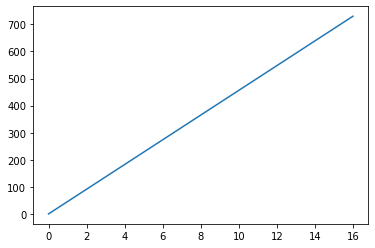

In [9]:
xpoints = np.array([0, 16])
ypoints = np.array([0, 730])

plt.plot(xpoints, ypoints)
plt.show()

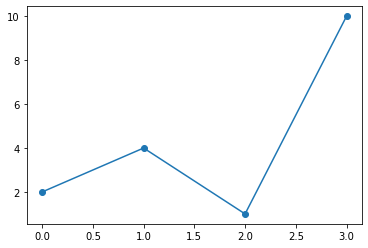

In [10]:
ypoints = np.array([2, 4, 1, 10])

plt.plot(ypoints, marker = 'o')
plt.show()

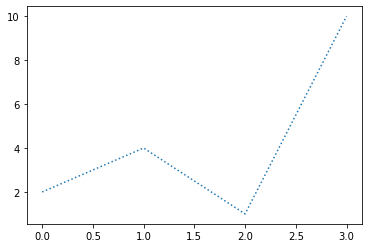

In [11]:
ypoints = np.array([2, 4, 1, 10])

plt.plot(ypoints, linestyle = 'dotted')
plt.show()

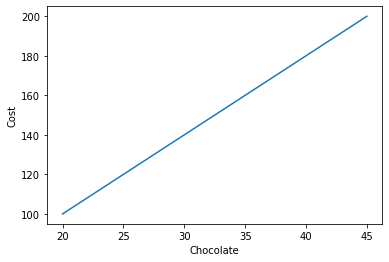

In [12]:
x = np.array([20, 25, 30, 35, 40, 45])
y = np.array([100, 120, 140, 160, 180, 200])

plt.plot(x,y)
plt.xlabel("Chocolate")
plt.ylabel("Cost")
plt.show()

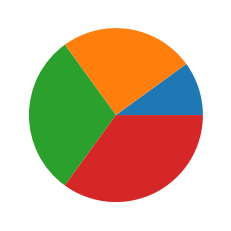

In [13]:
y = np.array([10, 25, 30, 35])
plt.pie(y)
plt.show()

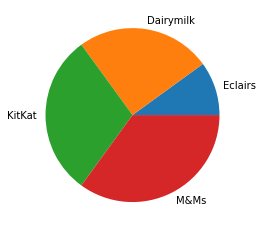

In [14]:
y = np.array([10, 25, 30, 35])

mylabels = ["Eclairs", "Dairymilk", "KitKat", "M&Ms"]

plt.pie(y, labels = mylabels)

plt.show()

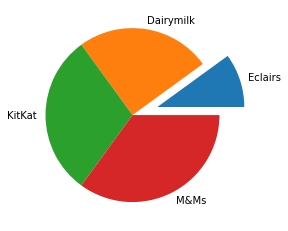

In [15]:
y = np.array([10, 25, 30, 35])

mylabels = ["Eclairs", "Dairymilk", "KitKat", "M&Ms"]
myexplode = [0.3, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode)

plt.show()

/Users/kritikaacharya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


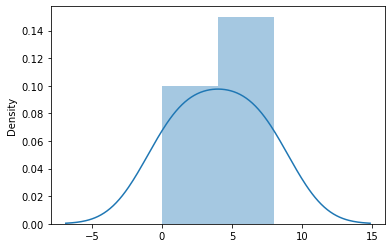

In [16]:
sns.distplot([0, 2, 4, 6, 8 ])
plt.show()

/Users/kritikaacharya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


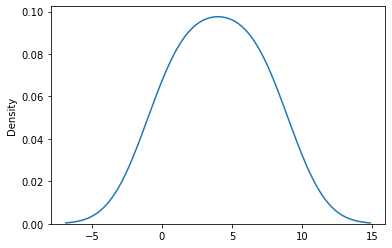

In [17]:
sns.distplot([0, 2, 4, 6, 8], hist = False)
plt.show()

In [18]:
num = np.random.randn(200)

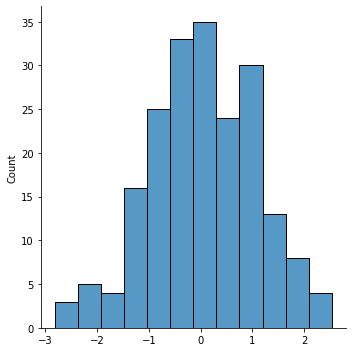

In [19]:
sns.displot(num)

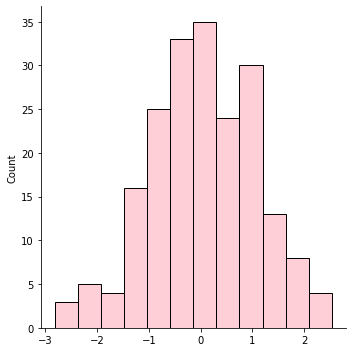

In [20]:
sns.displot(num, color="pink")

In [21]:
label_dist = pd.Series(num, name="MOVIES")

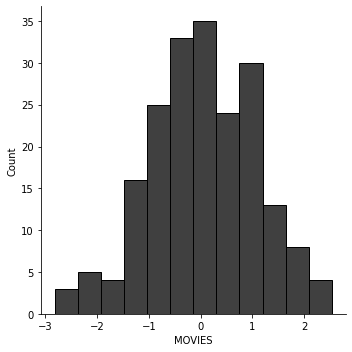

In [22]:
sns.displot(label_dist, color ="black")

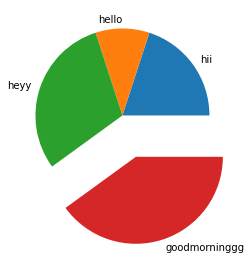

In [23]:
y = np.array([20, 10, 30, 40])

mylabels = ["hii", "hello", "heyy", "goodmorninggg"]
myexplode = [0, 0, 0, 0.5]

plt.pie(y, labels = mylabels, explode = myexplode)

plt.show()

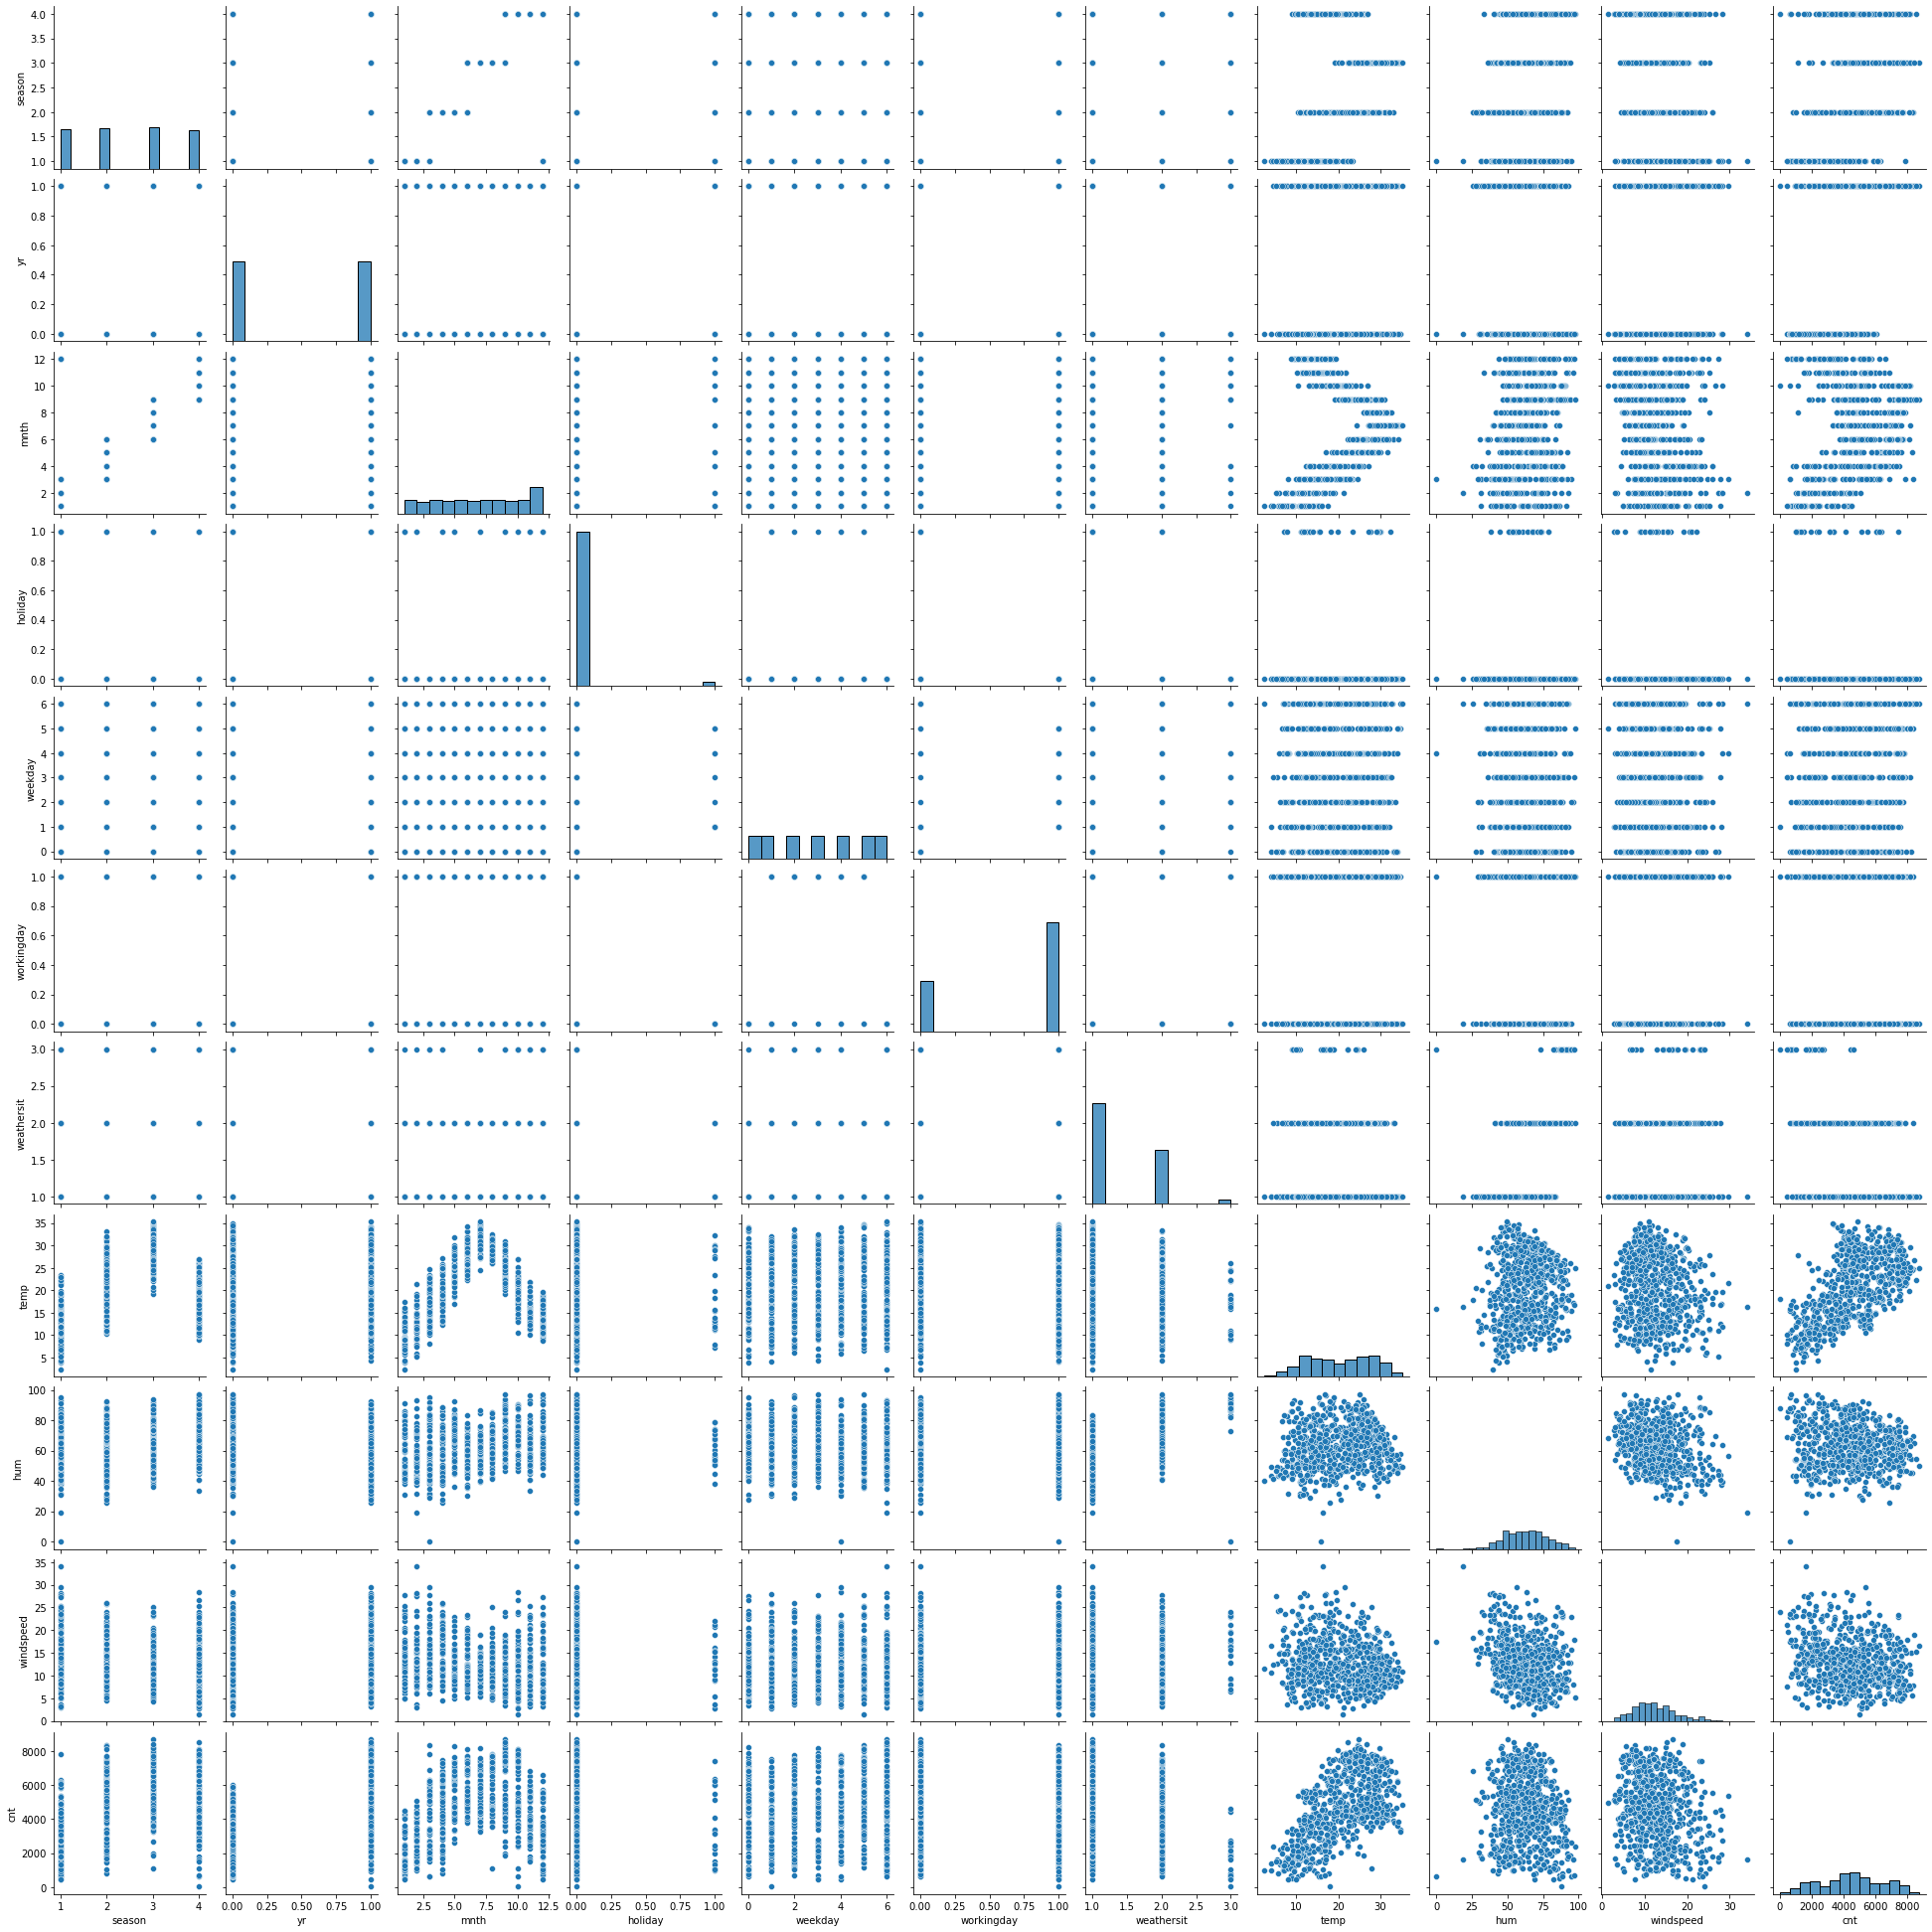

In [24]:
sns.pairplot(df)
plt.show()

In [25]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [26]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [27]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [28]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [29]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [30]:
df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [31]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [32]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [33]:
df.temp.value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

In [34]:
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [35]:
df.hum.value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

In [36]:
df.windspeed.value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

In [37]:
df.cnt.value_counts()
#continuous

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: cnt, Length: 695, dtype: int64

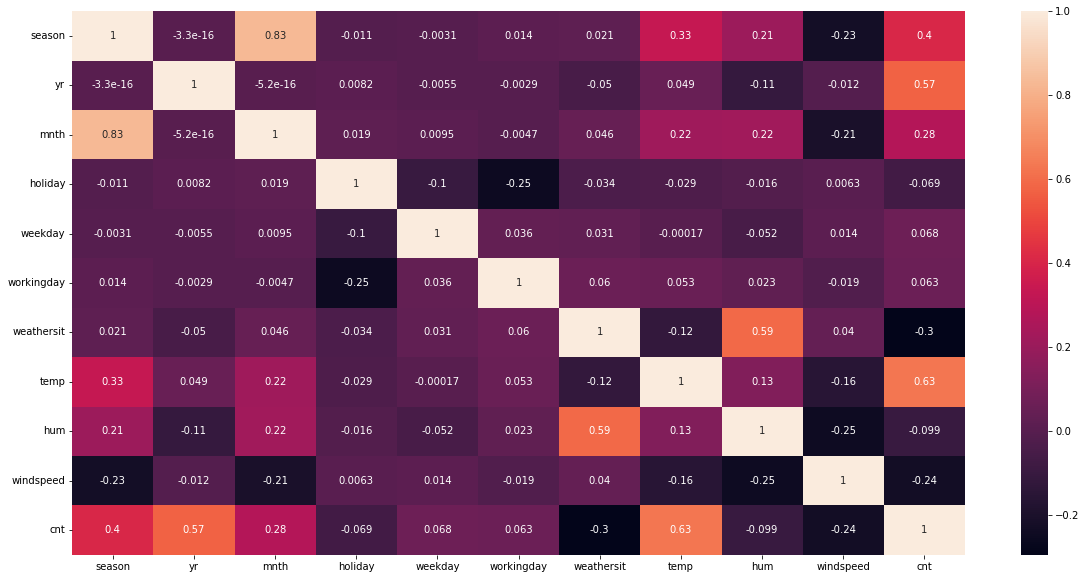

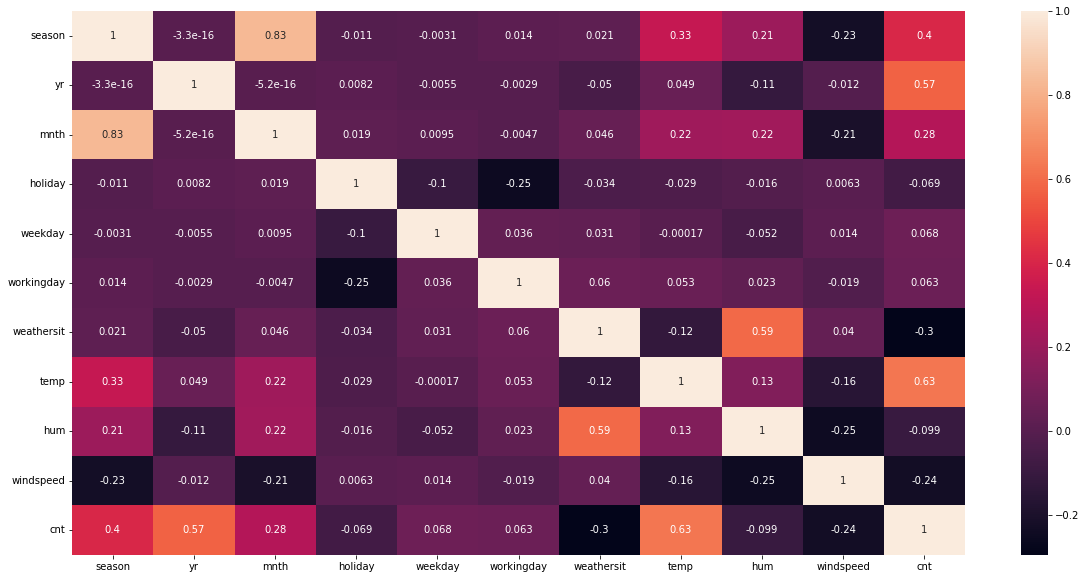

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [39]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


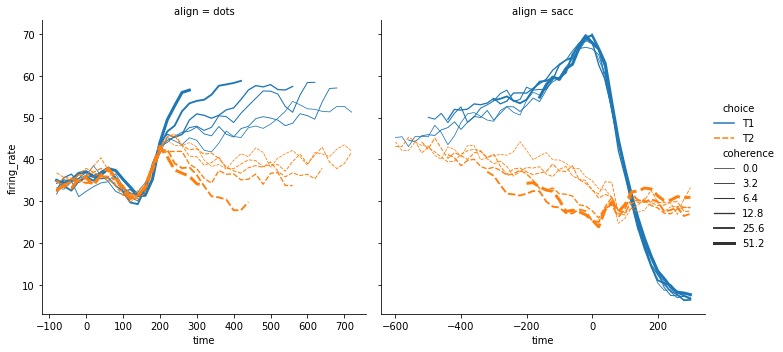

In [40]:
#relplot() :visualize amny diff reln, allows us to switch to the alternate representation
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

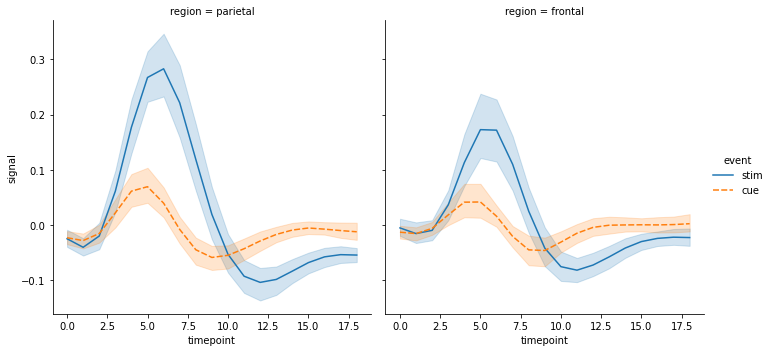

In [41]:
#average value nikalna
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

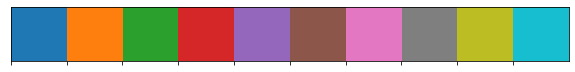

In [42]:
#color palette
palette = sns.color_palette() 
  
sns.palplot(palette) 
  
plt.show()

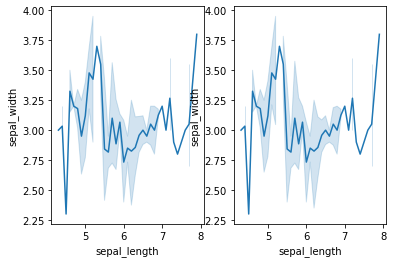

In [43]:
data = sns.load_dataset("iris")  
  
def graph(): 
    sns.lineplot(x="sepal_length", y="sepal_width", data=data) 
  
plt.subplot(121) 
graph() 

plt.subplot(122) 
graph() 
  
plt.show()

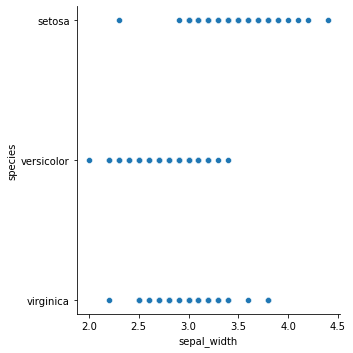

In [44]:
data = sns.load_dataset("iris") 
  
sns.relplot(x='sepal_width', y='species', data=data) 
  
plt.show()

In [45]:
def seasonname(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x ==3:
        return 'fall'
    else:
        return 'winter'

In [46]:
df['seasons'] = df['season'].apply(seasonname)

In [47]:
df = df.drop('season' , axis =1)

In [48]:
def weathersitname(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x ==3:
        return 'light_snow'
    else:
        return 'heavy_rain'

In [49]:
df['weather'] = df['weathersit'].apply(weathersitname)

In [50]:
df = df.drop('weathersit' , axis =1)

In [51]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,seasons,weather
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,spring,mist
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,spring,mist
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,spring,clear
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,spring,clear
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,spring,clear


In [52]:
def workingdayname(x):
    if x == 0:
        return 'workingday_yes'
    else:
        return 'workingday_no'

In [53]:
df['workingdays'] = df['workingday'].apply(workingdayname)

In [54]:
df = df.drop('workingday' , axis =1)

In [55]:
def weekdayname(x):
    if x == 1:
        return 'Sun'
    elif x == 2:
        return 'Mon'
    elif x == 3:
        return 'Tue'
    elif x == 4:
        return 'Wed'
    elif x == 5:
        return 'Thurs'
    elif x == 6:
        return 'Fri'
    else:
        return 'Sat'

In [56]:
df['weekdays'] = df['weekday'].apply(weekdayname)

In [57]:
df = df.drop('weekday' , axis =1)

In [58]:
def yearname(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

In [59]:
df['year'] = df['yr'].apply(yearname)

In [60]:
df = df.drop('yr' , axis =1)

In [61]:
df.head()

,mnth,holiday,temp,hum,windspeed,cnt,seasons,weather,workingdays,weekdays,year
0,1,0,14.110847,80.5833,10.749882,985,spring,mist,workingday_yes,Fri,2018
1,1,0,14.902598,69.6087,16.652113,801,spring,mist,workingday_yes,Sat,2018
2,1,0,8.050924,43.7273,16.636703,1349,spring,clear,workingday_no,Sun,2018
3,1,0,8.200000,59.0435,10.739832,1562,spring,clear,workingday_no,Mon,2018
4,1,0,9.305237,43.6957,12.522300,1600,spring,clear,workingday_no,Tue,2018


In [62]:
def monthname(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'

In [63]:
df['month'] = df['mnth'].apply(monthname)

In [64]:
df = df.drop('mnth' , axis =1)

In [65]:
df.head()

,holiday,temp,hum,windspeed,cnt,seasons,weather,workingdays,weekdays,year,month
0,0,14.110847,80.5833,10.749882,985,spring,mist,workingday_yes,Fri,2018,Jan
1,0,14.902598,69.6087,16.652113,801,spring,mist,workingday_yes,Sat,2018,Jan
2,0,8.050924,43.7273,16.636703,1349,spring,clear,workingday_no,Sun,2018,Jan
3,0,8.200000,59.0435,10.739832,1562,spring,clear,workingday_no,Mon,2018,Jan
4,0,9.305237,43.6957,12.522300,1600,spring,clear,workingday_no,Tue,2018,Jan


In [66]:
def holidayname(x):
    if x == 0:
        return 'Holiday'
    else:
        return 'No-Holiday'

In [67]:
df['holidays'] = df['holiday'].apply(holidayname)

In [68]:
df = df.drop('holiday' , axis =1)

In [69]:
df.head()

,temp,hum,windspeed,cnt,seasons,weather,workingdays,weekdays,year,month,holidays
0,14.110847,80.5833,10.749882,985,spring,mist,workingday_yes,Fri,2018,Jan,Holiday
1,14.902598,69.6087,16.652113,801,spring,mist,workingday_yes,Sat,2018,Jan,Holiday
2,8.050924,43.7273,16.636703,1349,spring,clear,workingday_no,Sun,2018,Jan,Holiday
3,8.200000,59.0435,10.739832,1562,spring,clear,workingday_no,Mon,2018,Jan,Holiday
4,9.305237,43.6957,12.522300,1600,spring,clear,workingday_no,Tue,2018,Jan,Holiday


In [70]:
month_dummy = pd.get_dummies(df.month, drop_first = True, dtype =int)
month_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [71]:
seasons_dummy = pd.get_dummies(df.seasons, drop_first = True, dtype =int)
seasons_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [72]:
year_dummy = pd.get_dummies(df.year, drop_first = True, dtype =int)
year_dummy.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [73]:
holidays_dummy = pd.get_dummies(df.holidays, drop_first = True, dtype =int)
holidays_dummy.head()

,No-Holiday
0,0
1,0
2,0
3,0
4,0


In [74]:
weather_dummy = pd.get_dummies(df.weather, drop_first = True, dtype =int)
weather_dummy.head()

,light_snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [75]:
weekdays_dummy = pd.get_dummies(df.weekdays, drop_first = True, dtype =int)
weekdays_dummy.head()

,Mon,Sat,Sun,Thurs,Tue,Wed
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [76]:
workingdays_dummy = pd.get_dummies(df.workingdays, drop_first = True, dtype =int)
workingdays_dummy.head()

,workingday_yes
0,1
1,1
2,0
3,0
4,0


In [77]:
#CONCAT function combines the text from multiple ranges and/or strings
final = pd.concat ([df, seasons_dummy, year_dummy, month_dummy, weather_dummy, workingdays_dummy, weekdays_dummy, holidays_dummy], axis = 1)
final.head()

,temp,hum,windspeed,cnt,seasons,weather,workingdays,weekdays,year,month,...,light_snow,mist,workingday_yes,Mon,Sat,Sun,Thurs,Tue,Wed,No-Holiday
0,14.110847,80.5833,10.749882,985,spring,mist,workingday_yes,Fri,2018,Jan,...,0,1,1,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,spring,mist,workingday_yes,Sat,2018,Jan,...,0,1,1,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,spring,clear,workingday_no,Sun,2018,Jan,...,0,0,0,0,0,1,0,0,0,0
3,8.200000,59.0435,10.739832,1562,spring,clear,workingday_no,Mon,2018,Jan,...,0,0,0,1,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,spring,clear,workingday_no,Tue,2018,Jan,...,0,0,0,0,0,0,0,1,0,0


In [78]:
#linear regression hunna so drop garya
final = final.drop('seasons', axis = 1)
final = final.drop('year', axis = 1)
final = final.drop('month', axis = 1)
final = final.drop('weather', axis = 1)
final = final.drop('workingdays', axis = 1)
final = final.drop('weekdays', axis = 1)
final = final.drop('holidays', axis = 1)

In [79]:
final.shape

(730, 29)

In [80]:
final.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,light_snow,mist,workingday_yes,Mon,Sat,Sun,Thurs,Tue,Wed,No-Holiday
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
#DIVIDING DATA INTO TRAIN AND TEST DATA

In [82]:
#dividing the data into train and test split
final_train, final_test = train_test_split(final, train_size = 0.2, random_state= 100)
print(final_train.shape)
print(final_test.shape)

(146, 29)
(584, 29)


In [83]:
#min max scaler

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
#instiuating scalar object
scaler = MinMaxScaler()

In [86]:
#creating a list of numeric variables
numeric = ['temp', 'hum', 'windspeed', 'cnt']

In [87]:
#fitting the scaler on the dataframe
final_train[numeric] = scaler.fit_transform(final_train[numeric])

In [88]:
final_train.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,light_snow,mist,workingday_yes,Mon,Sat,Sun,Thurs,Tue,Wed,No-Holiday
250,0.746555,1.000000,0.318885,0.157514,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
237,0.843981,0.810215,0.083449,0.521773,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
145,0.856265,0.721078,0.333806,0.523840,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
665,0.515971,0.739260,0.763115,0.495671,0,0,1,1,0,0,...,0,1,1,0,1,0,0,0,0,0
130,0.611794,0.673628,0.162832,0.459879,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [89]:
final_train.describe()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,light_snow,mist,workingday_yes,Mon,Sat,Sun,Thurs,Tue,Wed,No-Holiday
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.531470,0.657411,0.320926,0.496634,0.287671,0.260274,0.191781,0.486301,0.102740,0.068493,...,0.027397,0.335616,0.267123,0.130137,0.102740,0.164384,0.130137,0.178082,0.150685,0.020548
std,0.271658,0.154937,0.181372,0.263443,0.454235,0.440294,0.395057,0.501533,0.304664,0.253460,...,0.163800,0.473831,0.443980,0.337612,0.304664,0.371899,0.337612,0.383899,0.358973,0.142354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283477,0.550121,0.188094,0.302268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.585995,0.666976,0.277922,0.500517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.779485,0.775514,0.414520,0.713917,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
y_train = final_train.pop('cnt')
x_train = final_train

In [91]:
#observing y_train
y_train.head()

250    0.157514
237    0.521773
145    0.523840
665    0.495671
130    0.459879
Name: cnt, dtype: float64

In [92]:
#observing x_train
x_train.head()

,temp,hum,windspeed,spring,summer,winter,2019,Aug,Dec,Feb,...,light_snow,mist,workingday_yes,Mon,Sat,Sun,Thurs,Tue,Wed,No-Holiday
250,0.746555,1.000000,0.318885,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
237,0.843981,0.810215,0.083449,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
145,0.856265,0.721078,0.333806,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
665,0.515971,0.739260,0.763115,0,0,1,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
130,0.611794,0.673628,0.162832,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
#DATA MODELLING


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
#adding constant as statmodel.api doesnot include constants
x_train_sm = sm.add_constant(x_train)

#creating the model based on Ordinary Least Squares
lr = sm.OLS(y_train, x_train_sm)

#fititng the straight line that best fits to our dataset
lr_model = lr.fit()

#printing the summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     36.18
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           6.19e-45
Time:                        08:37:59   Log-Likelihood:                 150.72
No. Observations:                 146   AIC:                            -245.4
Df Residuals:                     118   BIC:                            -161.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2398      0.086      2.778      0.006       0.069       0.411
temp               0.4919      0.083      5.936      0.000       0.328       0.656
hum               -0.1818      0.067     -2.694      0.008      -0.315      -0.048
windspeed         -0.2496      0.055     -4.568      0.000      -0.358      -0.141
spring            -0.0574      0.068     -0.847      0.399      -0.192       0.077
summer             0.0798      0.058      1.372      0.173      -0.035       0.195
winter             0.1361      0.076      1.783      0.077      -0.015       0.287
2019               0.2804      0.017     16.904      0.000       0.248       0.313
Aug                0.0026      0.074      0.035      0.972      -0.145       0.150
Dec                0.0070      0.075      0.092      0.927      -0.142       0.156
Feb                0.0162      0.066      0.248      0.805      -0.114       0.146
Jan                0.0022      0.068      0.032      0.975      -0.132       0.137
Jul                0.0492      0.078      0.633      0.528      -0.105       0.203
Jun                0.0036      0.056      0.064      0.949      -0.107       0.115
Mar                0.0631      0.050      1.272      0.206      -0.035       0.161
May                0.0262      0.046      0.572      0.568      -0.064       0.117
Nov                0.0212      0.087      0.243      0.808      -0.152       0.194
Oct                0.0265      0.080      0.330      0.742      -0.133       0.186
Sep                0.1335      0.070      1.911      0.058      -0.005       0.272
light_snow        -0.2418      0.056     -4.345      0.000      -0.352      -0.132
mist              -0.0696      0.022     -3.156      0.002      -0.113      -0.026
workingday_yes     0.0377      0.025      1.489      0.139      -0.012       0.088
Mon                0.0045      0.025      0.177      0.860      -0.045       0.054
Sat               -0.0378      0.036     -1.052      0.295      -0.109       0.033
Sun                0.0132      0.024      0.553      0.581      -0.034       0.060
Thurs              0.0641      0.024      2.663      0.009       0.016       0.112
Tue                0.0274      0.022      1.233      0.220      -0.017       0.071
Wed                0.0456      0.025      1.806      0.073      -0.004       0.096
No-Holiday        -0.0473      0.059     -0.807      0.421      -0.163       0.069
==============================================================================
Omnibus:                       35.377   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.006
Skew:                          -0.877   Prob(JB):                     7.86e-25
Kurtosis:                       6.895   Cond. No.                     7.85e+15
================================

In [95]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
20,workingday_yes,45.44
23,Sun,26.45
25,Tue,25.99
26,Wed,23.30
24,Thurs,19.66
21,Mon,19.66
3,spring,14.98
5,winter,14.35
4,summer,10.36
16,Oct,8.88


In [96]:
#'MAr' has the lowest signifiance amongst the variables
x = x_train.drop('Mar', axis =1)

In [97]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     37.32
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           2.19e-45
Time:                        08:37:59   Log-Likelihood:                 149.72
No. Observations:                 146   AIC:                            -245.4
Df Residuals:                     119   BIC:                            -164.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2696      0.083      3.237      0.002       0.105       0.435
temp               0.4934      0.083      5.939      0.000       0.329       0.658
hum               -0.1825      0.068     -2.697      0.008      -0.316      -0.049
windspeed         -0.2563      0.055     -4.699      0.000      -0.364      -0.148
spring            -0.0288      0.064     -0.449      0.654      -0.156       0.098
summer             0.0724      0.058      1.247      0.215      -0.043       0.187
winter             0.1553      0.075      2.070      0.041       0.007       0.304
2019               0.2799      0.017     16.832      0.000       0.247       0.313
Aug               -0.0311      0.070     -0.446      0.656      -0.169       0.107
Dec               -0.0480      0.062     -0.774      0.440      -0.171       0.075
Feb               -0.0448      0.045     -1.003      0.318      -0.133       0.044
Jan               -0.0591      0.048     -1.234      0.220      -0.154       0.036
Jul                0.0164      0.074      0.222      0.825      -0.129       0.162
Jun               -0.0252      0.051     -0.491      0.624      -0.127       0.076
May                0.0006      0.041      0.014      0.989      -0.081       0.082
Nov               -0.0293      0.078     -0.376      0.708      -0.184       0.125
Oct               -0.0254      0.069     -0.366      0.715      -0.163       0.112
Sep                0.0983      0.064      1.529      0.129      -0.029       0.226
light_snow        -0.2296      0.055     -4.177      0.000      -0.338      -0.121
mist              -0.0681      0.022     -3.083      0.003      -0.112      -0.024
workingday_yes     0.0418      0.025      1.662      0.099      -0.008       0.092
Mon                0.0068      0.025      0.270      0.788      -0.043       0.057
Sat               -0.0374      0.036     -1.039      0.301      -0.109       0.034
Sun                0.0188      0.023      0.801      0.425      -0.028       0.065
Thurs              0.0691      0.024      2.908      0.004       0.022       0.116
Tue                0.0315      0.022      1.429      0.156      -0.012       0.075
Wed                0.0495      0.025      1.970      0.051      -0.000       0.099
No-Holiday        -0.0520      0.059     -0.886      0.377      -0.168       0.064
==============================================================================
Omnibus:                       32.142   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.144
Skew:                          -0.784   Prob(JB):                     1.09e-22
Kurtosis:                       6.764   Cond. No.                     1.11e+16
==============================================================================

Notes:
[1] Standard Errors assume t

In [98]:
#'Jun' has the lowest signifiance amongst the variables
x = x_train.drop('Jun', axis =1)

In [99]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     37.89
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           9.94e-46
Time:                        08:37:59   Log-Likelihood:                 150.71
No. Observations:                 146   AIC:                            -247.4
Df Residuals:                     119   BIC:                            -166.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2413      0.083      2.915      0.004       0.077       0.405
temp               0.4944      0.073      6.738      0.000       0.349       0.640
hum               -0.1823      0.067     -2.735      0.007      -0.314      -0.050
windspeed         -0.2506      0.052     -4.816      0.000      -0.354      -0.148
spring            -0.0583      0.066     -0.883      0.379      -0.189       0.072
summer             0.0788      0.056      1.415      0.160      -0.031       0.189
winter             0.1352      0.075      1.811      0.073      -0.013       0.283
2019               0.2804      0.017     16.980      0.000       0.248       0.313
Aug               -0.0007      0.053     -0.014      0.989      -0.106       0.104
Dec                0.0060      0.074      0.082      0.935      -0.140       0.152
Feb                0.0154      0.064      0.241      0.810      -0.111       0.142
Jan                0.0015      0.067      0.022      0.983      -0.131       0.134
Jul                0.0459      0.058      0.794      0.429      -0.069       0.160
Mar                0.0618      0.045      1.368      0.174      -0.028       0.151
May                0.0244      0.036      0.679      0.498      -0.047       0.096
Nov                0.0200      0.085      0.236      0.814      -0.148       0.188
Oct                0.0250      0.077      0.326      0.745      -0.127       0.177
Sep                0.1307      0.054      2.411      0.017       0.023       0.238
light_snow        -0.2413      0.055     -4.396      0.000      -0.350      -0.133
mist              -0.0694      0.022     -3.200      0.002      -0.112      -0.026
workingday_yes     0.0380      0.025      1.542      0.126      -0.011       0.087
Mon                0.0047      0.025      0.192      0.848      -0.044       0.054
Sat               -0.0377      0.036     -1.055      0.294      -0.108       0.033
Sun                0.0135      0.023      0.587      0.559      -0.032       0.059
Thurs              0.0642      0.024      2.686      0.008       0.017       0.111
Tue                0.0276      0.022      1.255      0.212      -0.016       0.071
Wed                0.0458      0.025      1.824      0.071      -0.004       0.095
No-Holiday        -0.0475      0.058     -0.813      0.418      -0.163       0.068
==============================================================================
Omnibus:                       35.132   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.879
Skew:                          -0.871   Prob(JB):                     1.38e-24
Kurtosis:                       6.876   Cond. No.                     1.22e+16
==============================================================================

Notes:
[1] Standard Errors assume t

In [100]:
# 'Oct' has the lowest signifiance amongst the variables

x = x.drop('Oct', axis =1)

In [101]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     39.70
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.64e-46
Time:                        08:37:59   Log-Likelihood:                 150.65
No. Observations:                 146   AIC:                            -249.3
Df Residuals:                     120   BIC:                            -171.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2453      0.082      3.009      0.003       0.084       0.407
temp               0.4899      0.072      6.823      0.000       0.348       0.632
hum               -0.1788      0.066     -2.728      0.007      -0.309      -0.049
windspeed         -0.2487      0.052     -4.828      0.000      -0.351      -0.147
spring            -0.0552      0.065     -0.848      0.398      -0.184       0.074
summer             0.0753      0.054      1.383      0.169      -0.033       0.183
winter             0.1516      0.055      2.753      0.007       0.043       0.261
2019               0.2804      0.016     17.043      0.000       0.248       0.313
Aug               -0.0045      0.052     -0.088      0.930      -0.107       0.097
Dec               -0.0129      0.045     -0.285      0.776      -0.102       0.077
Feb                0.0057      0.056      0.101      0.920      -0.106       0.117
Jan               -0.0085      0.059     -0.145      0.885      -0.125       0.108
Jul                0.0427      0.057      0.753      0.453      -0.070       0.155
Mar                0.0552      0.040      1.372      0.173      -0.024       0.135
May                0.0230      0.036      0.647      0.519      -0.047       0.093
Nov               -0.0025      0.049     -0.052      0.959      -0.100       0.095
Sep                0.1249      0.051      2.449      0.016       0.024       0.226
light_snow        -0.2415      0.055     -4.417      0.000      -0.350      -0.133
mist              -0.0692      0.022     -3.205      0.002      -0.112      -0.026
workingday_yes     0.0380      0.025      1.546      0.125      -0.011       0.087
Mon                0.0050      0.025      0.202      0.840      -0.044       0.054
Sat               -0.0368      0.035     -1.037      0.302      -0.107       0.033
Sun                0.0138      0.023      0.603      0.548      -0.032       0.059
Thurs              0.0657      0.023      2.812      0.006       0.019       0.112
Tue                0.0281      0.022      1.289      0.200      -0.015       0.071
Wed                0.0472      0.025      1.922      0.057      -0.001       0.096
No-Holiday        -0.0475      0.058     -0.816      0.416      -0.163       0.068
==============================================================================
Omnibus:                       34.481   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.112
Skew:                          -0.856   Prob(JB):                     5.51e-24
Kurtosis:                       6.831   Cond. No.                     1.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest ei

In [102]:
# 'Wed' has the lowest signifiance amongst the variables

x = x.drop('Wed', axis =1)

In [103]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     39.70
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.64e-46
Time:                        08:37:59   Log-Likelihood:                 150.65
No. Observations:                 146   AIC:                            -249.3
Df Residuals:                     120   BIC:                            -171.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2926      0.093      3.142      0.002       0.108       0.477
temp               0.4899      0.072      6.823      0.000       0.348       0.632
hum               -0.1788      0.066     -2.728      0.007      -0.309      -0.049
windspeed         -0.2487      0.052     -4.828      0.000      -0.351      -0.147
spring            -0.0552      0.065     -0.848      0.398      -0.184       0.074
summer             0.0753      0.054      1.383      0.169      -0.033       0.183
winter             0.1516      0.055      2.753      0.007       0.043       0.261
2019               0.2804      0.016     17.043      0.000       0.248       0.313
Aug               -0.0045      0.052     -0.088      0.930      -0.107       0.097
Dec               -0.0129      0.045     -0.285      0.776      -0.102       0.077
Feb                0.0057      0.056      0.101      0.920      -0.106       0.117
Jan               -0.0085      0.059     -0.145      0.885      -0.125       0.108
Jul                0.0427      0.057      0.753      0.453      -0.070       0.155
Mar                0.0552      0.040      1.372      0.173      -0.024       0.135
May                0.0230      0.036      0.647      0.519      -0.047       0.093
Nov               -0.0025      0.049     -0.052      0.959      -0.100       0.095
Sep                0.1249      0.051      2.449      0.016       0.024       0.226
light_snow        -0.2415      0.055     -4.417      0.000      -0.350      -0.133
mist              -0.0692      0.022     -3.205      0.002      -0.112      -0.026
workingday_yes    -0.0093      0.031     -0.295      0.769      -0.071       0.053
Mon               -0.0423      0.033     -1.283      0.202      -0.108       0.023
Sat               -0.0368      0.035     -1.037      0.302      -0.107       0.033
Sun               -0.0334      0.031     -1.078      0.283      -0.095       0.028
Thurs              0.0184      0.032      0.573      0.567      -0.045       0.082
Tue               -0.0191      0.030     -0.633      0.528      -0.079       0.041
No-Holiday        -0.0002      0.068     -0.004      0.997      -0.134       0.134
==============================================================================
Omnibus:                       34.481   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.112
Skew:                          -0.856   Prob(JB):                     5.51e-24
Kurtosis:                       6.831   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# 'No-Holiday' has the lowest signifiance amongst the variables

x = x.drop('No-Holiday', axis =1)

In [105]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     41.70
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           2.51e-47
Time:                        08:37:59   Log-Likelihood:                 150.65
No. Observations:                 146   AIC:                            -251.3
Df Residuals:                     121   BIC:                            -176.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2925      0.092      3.166      0.002       0.110       0.475
temp               0.4899      0.071      6.897      0.000       0.349       0.631
hum               -0.1788      0.065     -2.748      0.007      -0.308      -0.050
windspeed         -0.2487      0.051     -4.849      0.000      -0.350      -0.147
spring            -0.0552      0.065     -0.854      0.395      -0.183       0.073
summer             0.0754      0.054      1.400      0.164      -0.031       0.182
winter             0.1516      0.054      2.796      0.006       0.044       0.259
2019               0.2804      0.016     17.115      0.000       0.248       0.313
Aug               -0.0045      0.051     -0.088      0.930      -0.106       0.097
Dec               -0.0129      0.045     -0.287      0.775      -0.102       0.076
Feb                0.0057      0.056      0.101      0.919      -0.105       0.117
Jan               -0.0085      0.059     -0.145      0.885      -0.125       0.108
Jul                0.0428      0.056      0.759      0.449      -0.069       0.154
Mar                0.0552      0.040      1.380      0.170      -0.024       0.134
May                0.0230      0.035      0.651      0.516      -0.047       0.093
Nov               -0.0026      0.048     -0.054      0.957      -0.098       0.092
Sep                0.1249      0.051      2.468      0.015       0.025       0.225
light_snow        -0.2415      0.054     -4.440      0.000      -0.349      -0.134
mist              -0.0692      0.022     -3.219      0.002      -0.112      -0.027
workingday_yes    -0.0093      0.028     -0.332      0.741      -0.065       0.046
Mon               -0.0423      0.032     -1.312      0.192      -0.106       0.022
Sat               -0.0367      0.034     -1.081      0.282      -0.104       0.031
Sun               -0.0334      0.029     -1.161      0.248      -0.090       0.024
Thurs              0.0184      0.031      0.598      0.551      -0.043       0.079
Tue               -0.0191      0.029     -0.652      0.516      -0.077       0.039
==============================================================================
Omnibus:                       34.482   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.119
Skew:                          -0.856   Prob(JB):                     5.49e-24
Kurtosis:                       6.831   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# 'Thurs' has the lowest signifiance amongst the variables

x = x.drop('Thurs', axis =1)

In [107]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     43.72
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           4.45e-48
Time:                        08:37:59   Log-Likelihood:                 150.43
No. Observations:                 146   AIC:                            -252.9
Df Residuals:                     122   BIC:                            -181.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3058      0.089      3.419      0.001       0.129       0.483
temp               0.4865      0.071      6.890      0.000       0.347       0.626
hum               -0.1847      0.064     -2.880      0.005      -0.312      -0.058
windspeed         -0.2528      0.051     -4.987      0.000      -0.353      -0.152
spring            -0.0543      0.064     -0.842      0.401      -0.182       0.073
summer             0.0770      0.054      1.436      0.153      -0.029       0.183
winter             0.1543      0.054      2.862      0.005       0.048       0.261
2019               0.2800      0.016     17.151      0.000       0.248       0.312
Aug               -0.0018      0.051     -0.036      0.971      -0.102       0.099
Dec               -0.0152      0.045     -0.340      0.735      -0.103       0.073
Feb                0.0084      0.056      0.151      0.880      -0.102       0.119
Jan               -0.0096      0.059     -0.164      0.870      -0.125       0.106
Jul                0.0474      0.056      0.851      0.396      -0.063       0.158
Mar                0.0558      0.040      1.400      0.164      -0.023       0.135
May                0.0244      0.035      0.696      0.488      -0.045       0.094
Nov                0.0005      0.048      0.010      0.992      -0.094       0.095
Sep                0.1279      0.050      2.548      0.012       0.029       0.227
light_snow        -0.2485      0.053     -4.690      0.000      -0.353      -0.144
mist              -0.0673      0.021     -3.173      0.002      -0.109      -0.025
workingday_yes    -0.0164      0.025     -0.648      0.518      -0.067       0.034
Mon               -0.0519      0.028     -1.862      0.065      -0.107       0.003
Sat               -0.0394      0.034     -1.173      0.243      -0.106       0.027
Sun               -0.0418      0.025     -1.670      0.098      -0.091       0.008
Tue               -0.0283      0.025     -1.136      0.258      -0.078       0.021
==============================================================================
Omnibus:                       34.717   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.011
Skew:                          -0.862   Prob(JB):                     3.51e-24
Kurtosis:                       6.845   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#recursive feature Elimination

In [109]:
lm = LinearRegression()
lm.fit(x,y_train)

#running RFE and selecting 10 variables

rfe = RFE(lm)
rfe = rfe.fit(x, y_train)

In [110]:
#checking if particular variable was selected or not

list(zip(x.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 8),
 ('Feb', False, 11),
 ('Jan', False, 9),
 ('Jul', True, 1),
 ('Mar', True, 1),
 ('May', False, 6),
 ('Nov', False, 13),
 ('Sep', True, 1),
 ('light_snow', True, 1),
 ('mist', True, 1),
 ('workingday_yes', False, 10),
 ('Mon', False, 4),
 ('Sat', False, 3),
 ('Sun', False, 5),
 ('Tue', False, 7)]

In [111]:
#making a list of 15 variables

col = x.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'summer', 'winter', '2019', 'Jul', 'Mar',
       'Sep', 'light_snow', 'mist'],
      dtype='object')

In [112]:
final_df = x[col]

In [113]:
final_df.head()

,temp,hum,windspeed,summer,winter,2019,Jul,Mar,Sep,light_snow,mist
250,0.746555,1.000000,0.318885,0,0,0,0,0,1,1,0
237,0.843981,0.810215,0.083449,0,0,0,0,0,0,0,0
145,0.856265,0.721078,0.333806,1,0,0,0,0,0,0,0
665,0.515971,0.739260,0.763115,0,1,1,0,0,0,0,1
130,0.611794,0.673628,0.162832,1,0,0,0,0,0,0,0


In [114]:
# adding constant as statsmodel.api doesnot include constants

x_train_sm = sm.add_constant(final_df)

# creating the model based on Ordinary Least Squares 

lr = sm.OLS(y_train,x_train_sm)

# fitting the straight line that best fits to our dataset 

lr_model = lr.fit()

#printing the summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     93.96
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           2.25e-57
Time:                        08:37:59   Log-Likelihood:                 146.12
No. Observations:                 146   AIC:                            -268.2
Df Residuals:                     134   BIC:                            -232.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2150      0.046      4.652      0.000       0.124       0.306
temp           0.5562      0.034     16.288      0.000       0.489       0.624
hum           -0.1870      0.061     -3.066      0.003      -0.308      -0.066
windspeed     -0.2594      0.046     -5.647      0.000      -0.350      -0.169
summer         0.1144      0.020      5.740      0.000       0.075       0.154
winter         0.1850      0.022      8.469      0.000       0.142       0.228
2019           0.2793      0.016     17.880      0.000       0.248       0.310
Jul            0.0487      0.038      1.280      0.203      -0.027       0.124
Mar            0.0481      0.025      1.923      0.057      -0.001       0.098
Sep            0.1411      0.031      4.511      0.000       0.079       0.203
light_snow    -0.2169      0.050     -4.332      0.000      -0.316      -0.118
mist          -0.0688      0.020     -3.454      0.001      -0.108      -0.029
==============================================================================
Omnibus:                       28.068   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.362
Skew:                          -0.698   Prob(JB):                     2.15e-18
Kurtosis:                       6.381   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# 'summer' has the lowest signifiance amongst the variables

final_df = final_df.drop('summer', axis =1)

In [116]:
# 'Mar' has the lowest signifiance amongst the variables

final_df = final_df.drop('Mar', axis =1)

In [117]:
# 'winter' has the lowest signifiance amongst the variables

final_df = final_df.drop('winter', axis =1)

In [118]:
vif = pd.DataFrame()

vif['variables'] = final_df.columns

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

,variables,VIF
1,hum,9.84
0,temp,5.90
2,windspeed,3.22
7,mist,2.13
3,2019,1.88
4,Jul,1.23
5,Sep,1.21
6,light_snow,1.11


In [119]:
final_df = final_df.drop('hum', axis =1)

In [120]:
x_train_sm = sm.add_constant(final_df)

lr = sm.OLS(y_train,x_train_sm)

In [121]:
lr_model = lr.fit()

In [122]:
#FINAL MODEL SUMMARY
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     84.78
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           7.96e-47
Time:                        08:38:00   Log-Likelihood:                 109.84
No. Observations:                 146   AIC:                            -203.7
Df Residuals:                     138   BIC:                            -179.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1684      0.034      4.897      0.000       0.100       0.236
temp           0.5445      0.040     13.491      0.000       0.465       0.624
windspeed     -0.2036      0.055     -3.675      0.000      -0.313      -0.094
2019           0.2838      0.020     14.515      0.000       0.245       0.322
Jul           -0.0246      0.046     -0.536      0.593      -0.115       0.066
Sep            0.0676      0.037      1.816      0.072      -0.006       0.141
light_snow    -0.2484      0.061     -4.057      0.000      -0.370      -0.127
mist          -0.0931      0.022     -4.301      0.000      -0.136      -0.050
==============================================================================
Omnibus:                        1.823   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                1.488
Skew:                          -0.049   Prob(JB):                        0.475
Kurtosis:                       3.485   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
#creating a new dataframe that consists of the name of the variables and their respective VIF 
vif = pd.DataFrame() 

In [124]:
#assigning the column 'variables' with the columns of X_train 
vif['variables'] = final_df.columns 

In [125]:
#assigning the column 'VIF' with the VIF values of the variales 
vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])] 

In [126]:
#rounding off the VIF values to 2 decimal places 
vif['VIF'] = round(vif['VIF'],2) 

In [127]:
#sorting the VIF values in descending order 
vif = vif.sort_values(by = 'VIF' , ascending = False)

In [128]:
# printing the dataframe vif
vif

,variables,VIF
0,temp,3.04
1,windspeed,2.70
2,2019,1.81
6,mist,1.48
3,Jul,1.23
4,Sep,1.21
5,light_snow,1.07


In [129]:
# calculating the predicted values based on the training set 

y_train_pred = lr_model.predict(x_train_sm)

/Users/kritikaacharya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


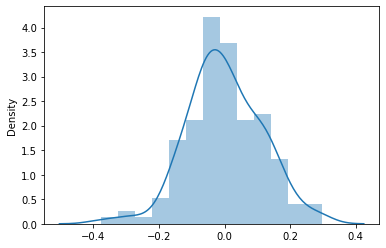

In [130]:
# computing the residuals (error in prediction) 

res = y_train - y_train_pred

# Checking the assumption : if the distribution of residual terms are centered around zero and is approximately normal 
sns.distplot(res)
plt.show()

/Users/kritikaacharya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


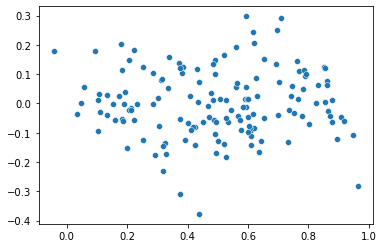

In [131]:
# Checking the assumption : If the residuals are randomly distributed 

sns.scatterplot(y_train_pred,res)
plt.show()

In [132]:
# Checking the assumption : The final model variables do not posses multicollinearity

vif = pd.DataFrame()

vif['variables'] = final_df.columns

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

,variables,VIF
0,temp,3.04
1,windspeed,2.70
2,2019,1.81
6,mist,1.48
3,Jul,1.23
4,Sep,1.21
5,light_snow,1.07


In [133]:
#Assumption Four: All the variables have VIF below 5 so they do not posses multicollinearity 

In [134]:
final_test.shape

(584, 29)

In [135]:
final_test[numeric] = scaler.fit_transform(final_test[numeric])

In [136]:
# making a list of the variables that appear in the final model 

var = ['temp','windspeed','2019','Jul','Sep','light_snow','mist','cnt']

In [137]:
pred_df = final_test[var]

In [138]:
final_df.head()

,temp,windspeed,2019,Jul,Sep,light_snow,mist
250,0.746555,0.318885,0,0,1,1,0
237,0.843981,0.083449,0,0,0,0,0
145,0.856265,0.333806,0,0,0,0,0
665,0.515971,0.763115,1,0,0,0,1
130,0.611794,0.162832,0,0,0,0,0


In [139]:
y_test = pred_df.pop('cnt')

In [140]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [141]:
x_test = pred_df

In [142]:
x_test.head()

,temp,windspeed,2019,Jul,Sep,light_snow,mist
184,0.831783,0.147762,0,1,0,0,1
535,0.901354,0.228617,1,0,0,0,0
299,0.511964,0.438556,0,0,0,0,1
221,0.881625,0.444796,0,0,0,0,0
152,0.817246,0.674935,0,0,0,0,0


In [143]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,temp,windspeed,2019,Jul,Sep,light_snow,mist
184,1.0,0.831783,0.147762,0,1,0,0,1
535,1.0,0.901354,0.228617,1,0,0,0,0
299,1.0,0.511964,0.438556,0,0,0,0,1
221,1.0,0.881625,0.444796,0,0,0,0,0
152,1.0,0.817246,0.674935,0,0,0,0,0


In [144]:
y_test_pred = lr_model.predict(x_test_sm)

/Users/kritikaacharya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kritikaacharya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


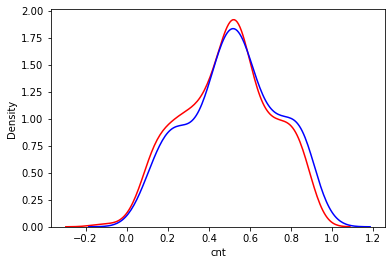

In [145]:
# creating the plot to measure the quality of prediction by the model  

sns.distplot(y_test_pred , color = 'red', hist = False)
sns.distplot(y_test, color = 'blue', hist= False)
plt.show()

In [146]:
#The graph of predicted values and the graph of actual values seem to be close to each other 
#Summary : the model is making good predictions based on the distplot 

In [147]:
from sklearn.metrics import r2_score

In [148]:
# computing the r2_score 

r2_score(y_true = y_test, y_pred = y_test_pred)

0.703513703022375

In [149]:
#The R squared value obtained in the training dataset : 0.811
#The R sqaured valiue obtained in the test dataset : 0.70
#The differene in values lie with the range of 10 percent.
#Summary : The model is making good predictions based on R squared values 

In [150]:
#Increase in temperature increases the demand of bikes 
#Increase in windspeed decreases the demand of bikes
#Demand of bikes decreases in spring 
#Demand of bikes increased in 2019 
#Demand of bikes decreases in July
#Demand of bikes increases in September
#Demand of bikes decreases when there is occurence of light snow
#Demand of bikes decreases when there is mist